# Minimal example for reading data from EXYZ.txt file

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
import seaborn as sns
import os
import sys

angstrom = 1e-10
kilo = 1e3
EXYZ_FILE = "DataFiles\EXYZ_He4-15.0MeV_2023-04-27_1333.txt"
# Read the data
df = pd.read_csv(
    EXYZ_FILE,
    sep="\s+",
    header=None,
    names=[
        "Ion Number",
        "Energy",
        "Depth",
        "Y",
        "Z",
        "Electronic Stop.",
        "Recoil Energy",
    ],
    engine="python",
    skiprows=15,
    converters={
        "Ion Number": lambda x: int(x.replace(",", ".")),
        "Energy": lambda x: float(x.replace(",", "."))*kilo,
        "Depth": lambda x: float(x.replace(",", "."))*angstrom,
        "Y": lambda x: float(x.replace(",", "."))*angstrom,
        "Z": lambda x: float(x.replace(",", "."))*angstrom,
        "Electronic Stop.": lambda x: float(x.replace(",", "."))/angstrom,
        "Recoil Energy": lambda x: float(x.replace(",", ".")),
    },
)

df.describe()

,Ion Number,Energy,Depth,Y,Z,Electronic Stop.,Recoil Energy
count,52.0,5.200000e+01,52.000000,52.000000,52.000000,5.200000e+01,52.000000
mean,1.0,7.460176e+06,0.096946,-0.000083,0.000135,1.151125e+08,12.144561
std,0.0,4.450408e+06,0.047541,0.000089,0.000227,6.384488e+07,22.653037
min,1.0,0.000000e+00,0.000000,-0.000295,-0.000846,0.000000e+00,0.000000
25%,1.0,3.690650e+06,0.059207,-0.000128,0.000094,6.836700e+07,3.377525
50%,1.0,7.470400e+06,0.106835,-0.000076,0.000186,9.116400e+07,5.263600
75%,1.0,1.124075e+07,0.139273,-0.000025,0.000278,1.456225e+08,9.472700
max,1.0,1.500000e+07,0.157740,0.000054,0.000338,2.684200e+08,123.580000


## Plotting a Bragg-peak in a few rows.

<Axes: xlabel='Depth'>

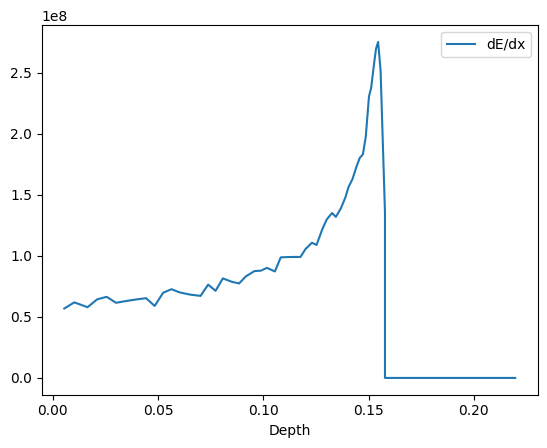

In [8]:
df["dE"] = df["Energy"].diff()
df["dx"] = df["Depth"].diff()
df['dE/dx'] = -df['dE']/df['dx']

# Create extended data frame
df_ext = pd.DataFrame()
tail_length = 20
dEdx_tail = pd.DataFrame(np.zeros((tail_length, 1)), columns=['dE/dx'])
extended_dEdx = pd.concat([df['dE/dx'], dEdx_tail['dE/dx']], ignore_index=True)
df_ext['dE/dx'] = extended_dEdx
last_depth = df['Depth'].iloc[-1]
depth_tail = pd.DataFrame(np.linspace(last_depth, last_depth + tail_length*df['dx'].mean(), tail_length), columns=['Depth'])
df_ext['Depth'] = pd.concat([df['Depth'], depth_tail['Depth']], ignore_index=True)

# fig, ax = plt.subplots(figsize=(10, 10))
# ax.plot(df['Depth'], df['dE/dx'])
df_ext.plot(x='Depth', y='dE/dx')


<Axes: xlabel='Y', ylabel='Z'>

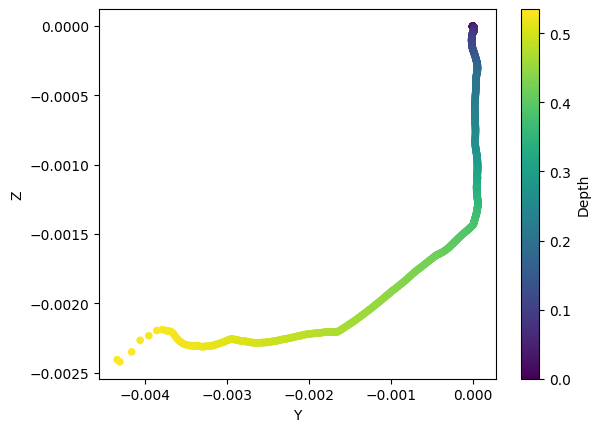

In [37]:
df.plot(x="Y", y="Z", kind="scatter", c="Depth", cmap="viridis")